<a href="https://colab.research.google.com/github/ParisDBRavo/Conv3d/blob/main/Conv3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución para imagenes a color

En el siguiente trabajo se extenderá el código visto en clase para realizar convoluciones a imágenes a color. 

## 1. Preparación

1.1 Importación de librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image

## 2. Datos

Para los datos vamos a usar dos imagenes a color proporcionadas por sklearn. Una de las razones por la cual seleccioné estas imágenes es para ver que a pesar de que mi convolución es cuadrada, la imágen es rectangular y no se tiene ningún problema para aplicar la convolución.

In [ ]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')  

In [ ]:
print(china.shape)
print(flower.shape)

(427, 640, 3)
(427, 640, 3)


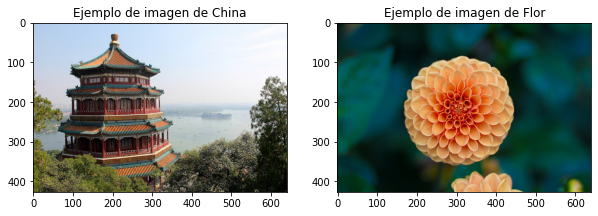

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(china) 
axs[0].set_title('Ejemplo de imagen de China')
axs[1].imshow(flower) 
axs[1].set_title('Ejemplo de imagen de Flor')
plt.show() 

## 3. Convolución
Usamos el código visto en clase para aplicar una convolución en tres canales.

In [ ]:
def conv3d(I, W, b, stride = 1):
  h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
  w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1

  a = np.zeros((h_s, w_s))
  for i in range(h_s):
      for j in range(w_s):
        I_m = I[ i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]

        a[i, j] = (I_m * W).sum() + b
                  
  return a

Se crea un filtro para probar la convolución.

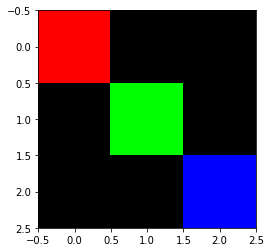

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]]]


In [ ]:
filter1 = np.zeros((3,3,3))
np.fill_diagonal(filter1, np.array([1, 1, 1]))
#filter1[0,1,0]= 1
plt.imshow(filter1) 
plt.show()
print(filter1)

### Prueba Sencilla
Para probar que en verdad el filtro se esté aplicando de manera correcta se realiza esta prueba sencilla con una matriz de 3x3x3.
$$ \begin{equation} Ejemplo =
\begin{pmatrix}
4 & 1 & 1 \\
1 & 1 & 1 \\
1 &  1&  1
\end{pmatrix}
\end{equation} $$
Entonces al poder verse como tres matrices cada una tiene un elemento distinto de la diagonal que no es igual a 1. Por lo que el cálculo para nuestro filtro creado sería simplemente sumar estos elementos.

In [ ]:
PruebaImagen = np.ones((3,3,3))
np.fill_diagonal(PruebaImagen, np.array([4, 2, 3]))
print(PruebaImagen)

[[[4. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 2. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 3.]]]


Aquí se muestra como el resultado es el correcto por lo que podemos trabajar con confianza. 

In [ ]:
ConvolucionEjemplo = conv3d(PruebaImagen, filter1, 0)
print(ConvolucionEjemplo)

[[9.]]


## 4. Aplicaciones de convoluciones

Primero vemos los resultados del primer filtro creado.

(425, 638)


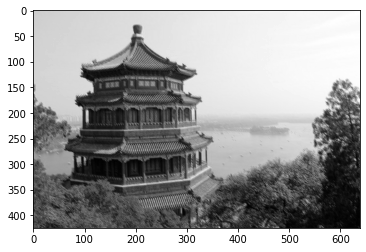

In [ ]:
ConvolucionEjemplo = conv3d(china, filter1, 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()

(425, 638)


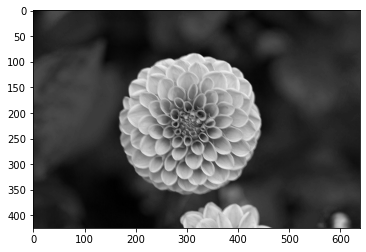

In [ ]:
ConvolucionEjemplo = conv3d(flower, filter1, 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()

Se crea otro filtro para ver los cambios.

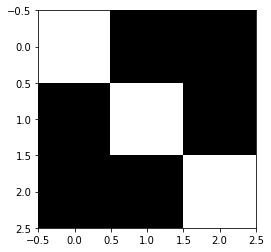

[[[1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]]]


In [ ]:
filter = np.zeros((3,3))
np.fill_diagonal(filter, np.array([1, 1, 1]))
#filter1[0,1,0]= 1
filter1 = np.stack((filter, filter, filter)).transpose((1,2,0))
plt.imshow(filter1) 
plt.show()
print(filter1)

(425, 638)


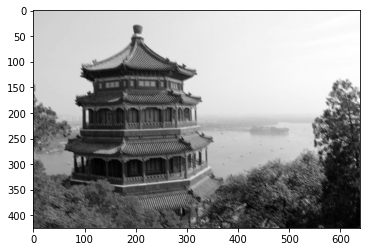

In [ ]:
ConvolucionEjemplo = conv3d(china, filter1, 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()

(425, 638)


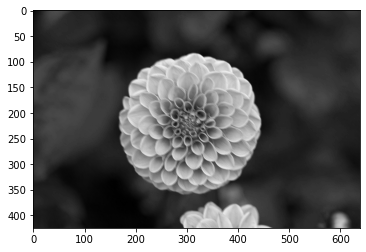

In [ ]:
ConvolucionEjemplo = conv3d(flower, filter1, 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()

### Varios filtros

Se muestran varios filtros y los resultados.

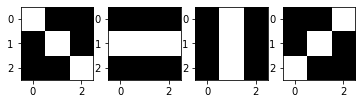

In [ ]:
filters = np.zeros((4, 3, 3, 3))
filters[0, :, :, :] = filter1
filters[1, 1, :, :] = 1
filters[2, :, 1, :] = 1
filters[3, :, :, :] = filter1[::-1]

b = np.zeros(4)

plt.subplot(1,4,1)
plt.imshow(filters[0]) 
plt.subplot(1,4,2)
plt.imshow(filters[1]) 
plt.subplot(1,4,3)
plt.imshow(filters[2]) 
plt.subplot(1,4,4)
plt.imshow(filters[3]) 
plt.show()

In [ ]:
def multi_conv3d(I, W, b, stride = 1):
  k = W.shape[0]
  activations = []
  for i in range(k):
    activations.append(conv3d(I, W[i], b[i], stride = 1)) 
                       
  return np.array(activations)

(4, 425, 638)
(4, 425, 638)


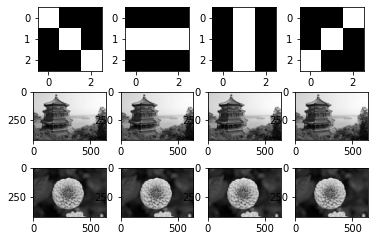

In [ ]:
activations_0 = multi_conv3d(china, filters, b)
activations_1 = multi_conv3d(flower, filters, b)
for i in range(4):
  plt.subplot(3,4,i + 1)
  plt.imshow(filters[i])
  plt.subplot(3,4,i + 5)
  plt.imshow(activations_0[i], cmap = 'gray')
  plt.subplot(3,4,i + 9)
  plt.imshow(activations_1[i], cmap = 'gray')
print(activations_0.shape)
print(activations_1.shape)

Es importante mencionar el resultado al aplicar la tangente hiperbólica y lo que resulta en estas imagenes. Creo que es un error pero no ahondé más.

(4, 425, 638)
(4, 425, 638)


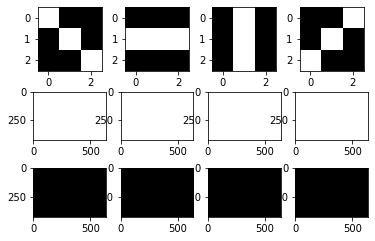

In [ ]:
activations_0 = np.tanh(multi_conv3d(china, filters, b))
activations_1 = np.tanh(multi_conv3d(flower, filters, b))
for i in range(4):
  plt.subplot(3,4,i + 1)
  plt.imshow(filters[i])
  plt.subplot(3,4,i + 5)
  plt.imshow(activations_0[i], cmap = 'gray')
  plt.subplot(3,4,i + 9)
  plt.imshow(activations_1[i], cmap = 'gray')
print(activations_0.shape)
print(activations_1.shape)

Finalmente empalmo varios filtros para que sea apreciable al ojo humano el cambio al aplicar las convoluciones. Se puede observar como las imagenes van perdiendo nitidez.

(417, 630)


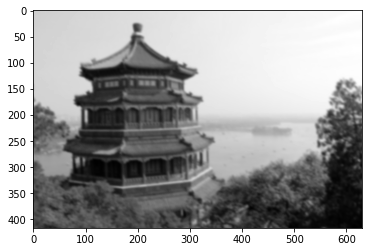

In [ ]:
ConvolucionEjemplo = conv3d(china, filter1, 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[0], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[1], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[2], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[3], 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()

(417, 630)


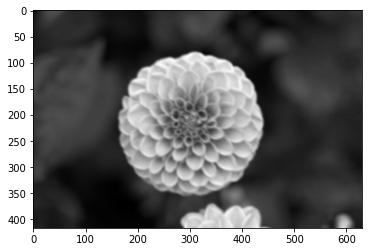

In [ ]:
ConvolucionEjemplo = conv3d(flower, filter1, 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[0], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[1], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[2], 0)
ConvolucionEjemplo = conv3d(ConvolucionEjemplo, filters[3], 0)
print(ConvolucionEjemplo.shape)
plt.imshow(ConvolucionEjemplo, cmap = 'gray') 
plt.show()